<a href="https://colab.research.google.com/github/Peter-Apps/coding-camp/blob/main/in_dev/messy_data/messy_mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Messy Data Sample Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./DoubleMuon.csv')
data.head(10)

,entry,subentry,run,luminosityBlock,event,nMuon,pt,eta,phi,mass,charge,pfRelIso03_all,pfRelIso04_all,tightId,softId,dxy,dxyErr,dz,dzErr
0,0,0,256676,1052,1433987112,2,32.664642,-0.478232,-2.692421,0.105700,1,1.009496,1.030894,True,True,0.010427,0.001131,0.006383,0.002373
1,0,1,256676,1052,1433987112,2,4.815899,-2.282161,-0.501225,0.105700,-1,1.191967,1.450307,True,True,0.028182,0.005242,0.025898,0.023694
2,1,0,256676,1052,1433999435,2,28.894447,-1.540517,0.486790,0.105700,1,1.482681,1.552032,True,True,-0.000464,0.001059,0.000408,0.003900
3,1,1,256676,1052,1433999435,2,18.273682,1.629738,-2.872056,0.105700,1,1.901988,2.214382,True,True,0.001154,0.001371,-0.018171,0.004747
4,2,0,256676,1052,1433908571,2,29.105162,1.408017,0.587468,0.105658,-1,-999.000000,-999.000000,False,False,-999.000000,-999.000000,-999.000000,-999.000000
5,2,1,256676,1052,1433908571,2,15.174359,1.411526,0.559014,0.105700,-1,0.251537,0.691021,False,False,0.857679,0.033806,-0.379237,0.668916
6,3,0,256676,1052,1433935931,2,18.395970,1.833421,-1.602296,0.105700,1,0.132132,0.205391,True,True,-0.002311,0.002327,0.005431,0.006480
7,3,1,256676,1052,1433935931,2,1.376850,-1.886745,-2.561345,0.105700,-1,0.455499,1.024312,False,True,-999.000000,-999.000000,-999.000000,-999.000000
8,4,0,256676,1052,1433618910,2,22.962961,0.578997,2.080563,0.105700,1,0.559044,0.559044,True,True,-0.000386,0.001389,0.001791,0.002359
9,4,1,256676,1052,1433618910,2,1.750105,2.134432,-1.327301,0.105700,1,0.000000,0.000000,True,True,0.004609,0.012028,-0.004009,0.049723


In [ ]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(2001114, 19)

In [ ]:
# file has two muons from same event on separate lines.
# to make each event on a single line, with both muon properties:
zeros = data.loc[data['subentry'] == 0].head().copy()
ones = data.loc[data['subentry'] == 1].head().copy()
new_data = data.loc[data['subentry'] == 0].copy()
new_data = new_data.merge(data.loc[data['subentry'] == 1].copy(), on='entry', how='left')

# tidy up columns
new_data = new_data.drop(columns=['entry', 'nMuon_x', 'nMuon_y', 'subentry_x', 'luminosityBlock_x',
       'pfRelIso03_all_x', 'pfRelIso04_all_x', 'tightId_x', 'softId_x',
       'dxy_x', 'dxyErr_x', 'dz_x', 'dzErr_x', 'subentry_y', 'run_y',
       'luminosityBlock_y', 'event_y', 'pfRelIso03_all_y', 'pfRelIso04_all_y',
       'tightId_y', 'softId_y', 'dxy_y', 'dxyErr_y', 'dz_y', 'dzErr_y'])

# shorter dataframe name, calculate inv. mass and net charge
df = new_data.copy()
df['mass'] = np.sqrt(2*df.pt_x*df.pt_y*(np.cosh(df.eta_x - df.eta_y) - np.cos(df.phi_x - df.phi_y)))
df['net_q'] = df['charge_x'] + df['charge_y']

df.head()

,run_x,event_x,pt_x,eta_x,phi_x,mass_x,charge_x,pt_y,eta_y,phi_y,mass_y,charge_y,mass,net_q
0,256676,1433987112,32.664642,-0.478232,-2.692421,0.105700,1,4.815899,-2.282161,-0.501225,0.1057,-1,34.120712,0
1,256676,1433999435,28.894447,-1.540517,0.486790,0.105700,1,18.273682,1.629738,-2.872056,0.1057,1,116.735176,2
2,256676,1433908571,29.105162,1.408017,0.587468,0.105658,-1,15.174359,1.411526,0.559014,0.1057,-1,0.602487,-2
3,256676,1433935931,18.395970,1.833421,-1.602296,0.105700,1,1.376850,-1.886745,-2.561345,0.1057,-1,31.888244,0
4,256676,1433618910,22.962961,0.578997,2.080563,0.105700,1,1.750105,2.134432,-1.327301,0.1057,1,16.625301,2


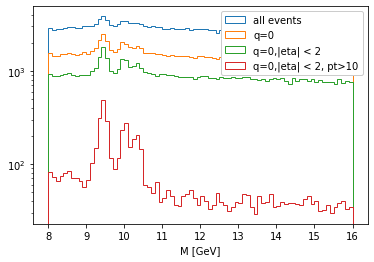

In [ ]:
# comparing cuts
plotdata = df.loc[df['net_q'] == 0]
eta_cut = 2
pt_cut = 10
plotdata2 = plotdata.loc[(np.abs(plotdata['eta_x']) < eta_cut) & (np.abs(plotdata['eta_y']) < eta_cut)]
plotdata3 = plotdata2.loc[(plotdata2['pt_x'] > pt_cut) & (plotdata2['pt_y'] > pt_cut)]

nbins = 80
xrange = (8,16)
plt.hist(df['mass'], histtype='step', bins=nbins, range=xrange, label="all events")
plt.hist(plotdata['mass'], histtype='step', bins=nbins, range=xrange, label="q=0")
plt.hist(plotdata2['mass'], histtype='step', bins=nbins, range=xrange, label="q=0,|eta| < " + str(eta_cut))
plt.hist(plotdata3['mass'], histtype='step', bins=nbins, range=xrange, label="q=0,|eta| < " + str(eta_cut)+", pt>10")

plt.legend(framealpha=1, fancybox=True, loc='upper right')
plt.xlabel('M [GeV]')
plt.yscale('log')
plt.show()

# Acknowledgements & Licenses

The development and implementation of these materials and workshop were additionally funded by generous support from IRIS-HEP, the [Institute for Research and Innovation in Software for High Energy Physics](https://iris-hep.org/).

This work is licensed under a
[Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License][cc-by-nc-sa].

[![CC BY-NC-SA 4.0][cc-by-nc-sa-image]][cc-by-nc-sa]

[cc-by-nc-sa]: http://creativecommons.org/licenses/by-nc-sa/4.0/
[cc-by-nc-sa-image]: https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png
[cc-by-nc-sa-shield]: https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg